In [32]:
import glob
import numpy as np
import pandas as pd
import plotly_express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [33]:
path = r'/kaggle/input/road-accident-casualties/*.csv'
all_files = glob.glob(path)

df = pd.concat((pd.read_csv(f) for f in all_files), axis=1)

In [34]:
df.head()

,Accident_Date,Latitude,Number_of_Casualties,Light_Conditions,Index,Longitude,Urban_or_Rural_Area,Accident_Severity,District_Area,Road_Surface_Conditions,Number_of_Vehicles,Road_Type,Weather_Conditions,Vehicle_Type
0,2019-01-08,50.820746,7,Darkness - lights unlit,2.01E+12,-0.325025,Unallocated,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Minibus (8 - 16 passenger seats)
1,2019-01-18,50.831465,6,Darkness - lights unlit,2.01E+12,-0.295104,Unallocated,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Agricultural vehicle
2,2019-01-29,50.827024,6,Darkness - lights unlit,2.01E+12,-0.323807,Unallocated,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Agricultural vehicle
3,2019-02-10,50.839773,6,Darkness - lights unlit,2.01E+12,-0.303607,Rural,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Agricultural vehicle
4,2019-02-09,50.847946,6,Darkness - lights unlit,2.01E+12,-0.284417,Rural,Fatal,Adur,Flood over 3cm. deep,1,Slip road,Snowing + high winds,Minibus (8 - 16 passenger seats)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660669 entries, 0 to 660668
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Date            625000 non-null  object 
 1   Latitude                 660653 non-null  float64
 2   Number_of_Casualties     660669 non-null  int64  
 3   Light_Conditions         603638 non-null  object 
 4   Index                    579474 non-null  object 
 5   Longitude                660653 non-null  float64
 6   Urban_or_Rural_Area      660654 non-null  object 
 7   Accident_Severity        660669 non-null  object 
 8   District_Area            623498 non-null  object 
 9   Road_Surface_Conditions  659943 non-null  object 
 10  Number_of_Vehicles       660669 non-null  int64  
 11  Road_Type                443385 non-null  object 
 12  Weather_Conditions       423735 non-null  object 
 13  Vehicle_Type             657364 non-null  object 
dtypes: f

In [36]:
print("Number of unique values in each columns")
for i in df.columns:
    print(f'{i}-{df[i].nunique()}')

Number of unique values in each columns
Accident_Date-1461
Latitude-511617
Number_of_Casualties-36
Light_Conditions-3
Index-377786
Longitude-529766
Urban_or_Rural_Area-3
Accident_Severity-3
District_Area-398
Road_Surface_Conditions-5
Number_of_Vehicles-19
Road_Type-5
Weather_Conditions-5
Vehicle_Type-16


In [37]:
df.isnull().sum()

Accident_Date               35669
Latitude                       16
Number_of_Casualties            0
Light_Conditions            57031
Index                       81195
Longitude                      16
Urban_or_Rural_Area            15
Accident_Severity               0
District_Area               37171
Road_Surface_Conditions       726
Number_of_Vehicles              0
Road_Type                  217284
Weather_Conditions         236934
Vehicle_Type                 3305
dtype: int64

In [38]:
df=df.drop(['Index'],axis=1)

In [39]:
df.fillna({'Road_Type': 'Unspecified', 'Weather_Conditions': 'Other',
           'Light_Conditions': 'Unspecified', 'Road_Surface_Conditions': 'Unspecified',
          'District_Area': 'Unspecified', 'Vehicle_Type': 'Unspecified'}, inplace=True)

In [40]:
df.dropna(subset=['Longitude'],inplace=True)
df.dropna(subset=['Accident_Date'],inplace=True)

In [41]:
df = df[df['Urban_or_Rural_Area'] != 'Unallocated']

In [42]:
df['Accident_Date'] = pd.to_datetime(df['Accident_Date'])

In [43]:
df['Day_of_week']=df['Accident_Date'].dt.dayofweek

In [44]:
df['Month']=df['Accident_Date'].dt.month

In [45]:
le = LabelEncoder()
df_proc = df[['Light_Conditions', 'Urban_or_Rural_Area', 'Accident_Severity', 'District_Area', 'Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions', 'Vehicle_Type', 'Day_of_week', 'Month']].apply(lambda col: le.fit_transform(col))

df_proc[['Accident_Date', 'Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Day_of_Week', 'Month']] = df[['Accident_Date', 'Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Day_of_week', 'Month']]

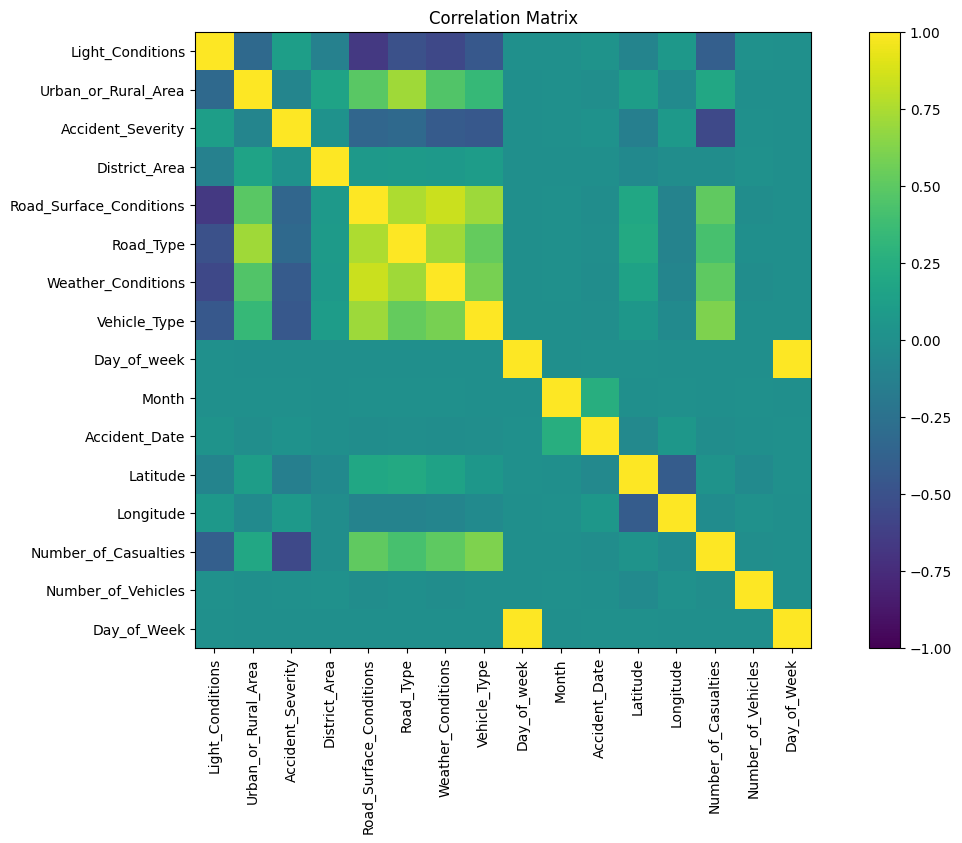

In [46]:
plt.figure(figsize=(15,8))

plt.imshow(df_proc.corr(), cmap='viridis', vmin=-1, vmax=1)
plt.xticks(range(len(df_proc.corr().columns)), df_proc.corr().columns, rotation=90)
plt.yticks(range(len(df_proc.corr().columns)), df_proc.corr().columns)
plt.colorbar()
plt.title('Correlation Matrix')

plt.show()

In [48]:
final = df_proc.drop(['Number_of_Casualties','Accident_Date','District_Area','Longitude','Latitude'],axis=1)

In [49]:
final.head()

,Light_Conditions,Urban_or_Rural_Area,Accident_Severity,Road_Surface_Conditions,Road_Type,Weather_Conditions,Vehicle_Type,Day_of_week,Month,Number_of_Vehicles,Day_of_Week
3,1,0,0,1,4,4,0,6,2,1,6
4,1,0,0,1,4,4,5,5,2,1,5
5,1,0,0,1,4,4,0,3,2,1,3
6,1,0,0,1,4,4,5,4,3,1,4
7,1,0,0,1,4,4,5,4,3,1,4


In [50]:
X=final.drop(['Accident_Severity'],axis=1)
y=final['Accident_Severity']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
dtree=DecisionTreeClassifier()

dtree.fit(X_train,y_train)
dtree_results=dtree.predict(X_test)
dtree_mae=mean_absolute_error(y_test,dtree_results)
print('Decision Tree:\n'+classification_report(y_test,dtree_results))

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2644
           1       0.95      1.00      0.97     15625
           2       1.00      0.99      1.00    169231

    accuracy                           0.99    187500
   macro avg       0.98      0.94      0.96    187500
weighted avg       0.99      0.99      0.99    187500

